# Google Gemini Vision Pro LlamaIndex
> Explain XKCD 

[Hemanth HM](https://h3manth.com)

### Install Deps

In [2]:
%pip install llama-index-llms-gemini google-generativeai llama-index-embeddings-google -qU

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request
Note: you may need to restart the kernel to use updated packages.


### Set Keys

In [2]:
import os
os.environ["GOOGLE_API_KEY"] = "YOUR_KEY"

### Helper Functions

In [6]:
import textwrap
from IPython.display import Markdown

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def display_img(img_url):
    img_response = requests.get(img_url)
    print(img_url)
    img = Image.open(BytesIO(img_response.content))
    plt.imshow(img)

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

def getXKCD():
    return requests.get("https://xkcd.com/info.0.json").json()['img']

https://imgs.xkcd.com/comics/eclipse_coolness.png


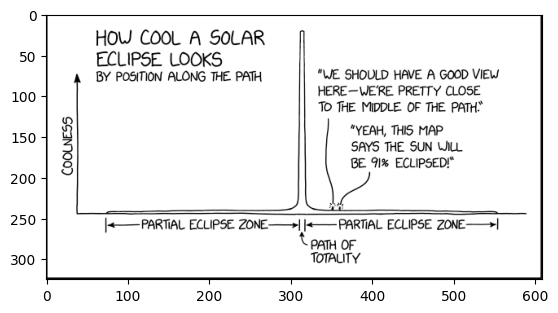

In [3]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal
from llama_index.core.multi_modal_llms.generic_utils import load_image_urls

gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

image_urls = [getXKCD()]

display_img(image_urls[0])

image_documents = load_image_urls(image_urls)

### Response astream complete

In [20]:
response_astream_complete = await gemini_pro.astream_complete(
    prompt="Describe the XKCD cartoon in detail",
    image_documents=image_documents,
)

### print delta 

In [21]:
async for delta in response_astream_complete:
    print(delta.text)

 The XKCD cartoon shows a graph with the coolness of a solar eclipse on the Y-axis and the position along the path of the eclipse on the X
-axis. The graph shows that the coolness of the eclipse is highest in the path of totality, where the sun is completely blocked by the moon. The coolness
 of the eclipse decreases as you move away from the path of totality, until it reaches the partial eclipse zone, where the sun is only partially blocked by the moon. The caption at the top of the graph reads "How Cool a Solar Eclipse Looks By Position Along the Path". There are two people standing just outside the path
 of totality. One of them is saying "We should have a good view here - we're pretty close to the middle of the path." The other person is looking at a map and says "Yeah, this map says the sun will be 91% eclipsed!"
